In [12]:
path = './tableDetectTest.png'

In [13]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(path)

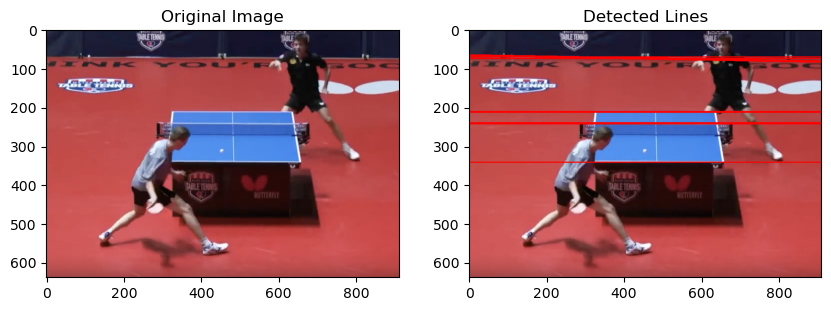

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread(path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Create a copy of the original image to draw lines
line_image = image.copy()

# Draw the lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image and the image with detected lines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Detected Lines')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.show()

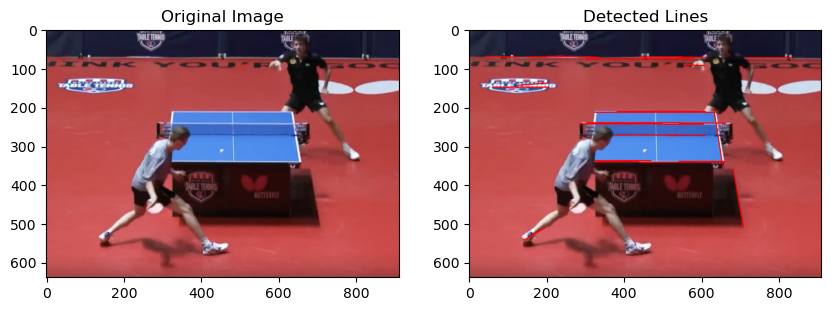

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread(path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform (Probabilistic)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
line_image = image.copy()

# Draw the lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image and the image with detected lines
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Detected Lines')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.show()


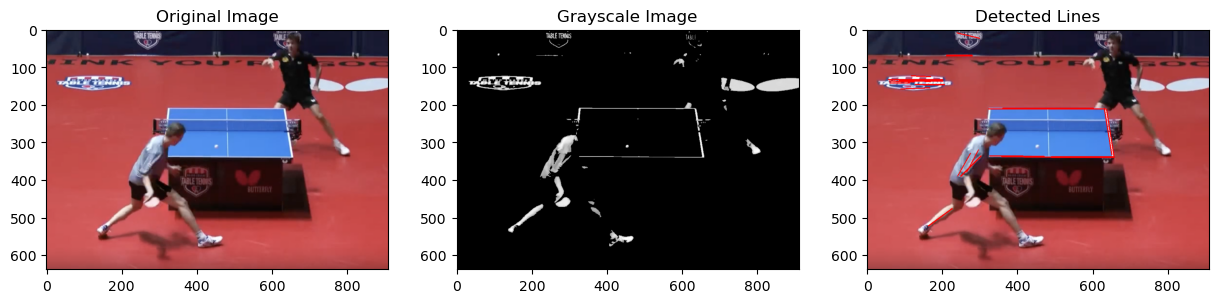

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a broader range for white color in HSV
lower_white = np.array([0, 0, 170])
upper_white = np.array([180, 80, 255])

# Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_white, upper_white)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask=mask)

# Convert the result to grayscale
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform (Probabilistic)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
line_image = image.copy()

# Draw the lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image, grayscale image, and the image with detected lines
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Detected Lines')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

def process_video(input_video_path, output_video_path, frame_skip=5, line_threshold=10):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    line_counts = {}
    frame_index = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # if frame_index % frame_skip == 0:
        # Convert to HSV color space
        # hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # # Define a broader range for white color in HSV
        # lower_white = np.array([0, 0, 170])
        # upper_white = np.array([180, 80, 255])
        
        # # Threshold the HSV image to get only white colors
        # mask = cv2.inRange(hsv, lower_white, upper_white)
        
        # Apply Canny edge detection directly on mask
        edges = cv2.Canny(frame, 50, 150, apertureSize=3)
        
        # Detect lines using Hough Line Transform (Probabilistic)
        lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
        
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                line_key = (x1, y1, x2, y2)
                if line_key in line_counts:
                    line_counts[line_key] += 1
                else:
                    line_counts[line_key] = 1
        
        frame_index += 1

    cap.release()
    
    # Filter lines that are repeated enough
    filtered_lines = [key for key, count in line_counts.items() if count >= line_threshold]
    
    cap = cv2.VideoCapture(input_video_path)
    frame_index = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # if frame_index % frame_skip == 0:
        # Draw the filtered lines on the frame
        for line in filtered_lines:
            x1, y1, x2, y2 = line
            cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
        out.write(frame)
        frame_index += 1
    
    cap.release()
    out.release()
    
    # Save line positions in a pickle file
    with open('line_positions.pkl', 'wb') as f:
        pickle.dump(filtered_lines, f)
    
    print("Processing complete. Output video saved at:", output_video_path)

In [5]:
# Call the function with your video path
process_video('./TrackNetV3/LongVLebrunClip.mp4', './out/output_LONG_with_lines.mp4')

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Processing complete. Output video saved at: ./out/output_LONG_with_lines.mp4


## BALL BOUNCE COUNTER 

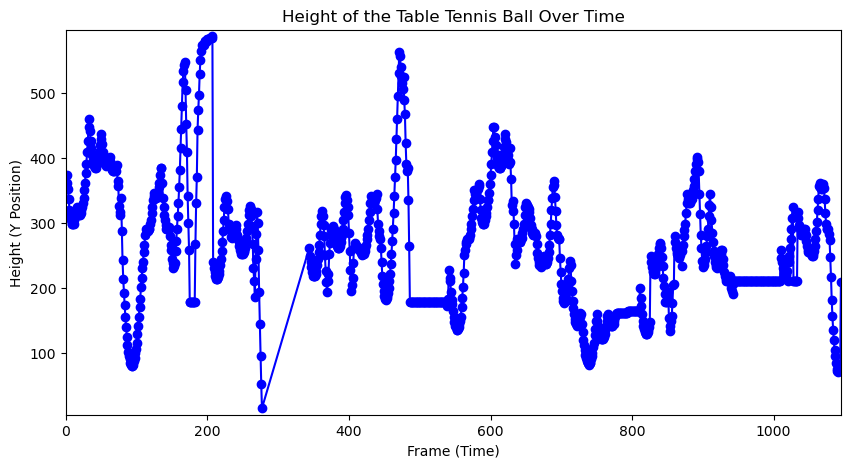

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
file_path = './data/tabletennis_ball.csv'  # Update with the actual file path if different
data = pd.read_csv(file_path)

# Filter out the rows where Visibility is 0
data = data[data['Visibility'] == 1]

# Extract the Frame and Y columns
frames = data['Frame']
y_coords = data['Y']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(min(frames), max(frames))
ax.set_ylim(min(y_coords) - 10, max(y_coords) + 10)
ax.set_title('Height of the Table Tennis Ball Over Time')
ax.set_xlabel('Frame (Time)')
ax.set_ylabel('Height (Y Position)')

# Plot the data
ax.plot(frames, y_coords, marker='o', linestyle='-', color='b')

# Show the plot
plt.show()

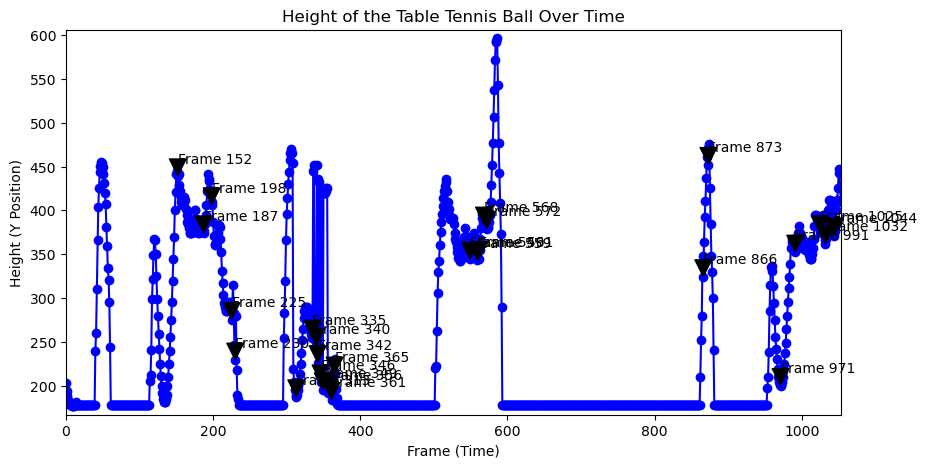

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

# Load the data into a Pandas DataFrame
file_path = './out/data/LongVLebrunClip_ball.csv'  # Update with the actual file path if different
data = pd.read_csv(file_path)

# Filter out the rows where Visibility is 0
data = data[data['Visibility'] == 1]

# Extract the Frame and Y columns
frames = data['Frame']
y_coords = data['Y']

# Find local minima
order = 1  # You can experiment with different values
local_minima_indices = argrelextrema(y_coords.values, np.less, order=order)[0]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(min(frames), max(frames))
ax.set_ylim(min(y_coords) - 10, max(y_coords) + 10)
ax.set_title('Height of the Table Tennis Ball Over Time')
ax.set_xlabel('Frame (Time)')
ax.set_ylabel('Height (Y Position)')

# Plot the data
ax.plot(frames, y_coords, marker='o', linestyle='-', color='b')

# Annotate local minima
for idx in local_minima_indices:
    ax.annotate(f'Frame {frames.iloc[idx]}', xy=(frames.iloc[idx], y_coords.iloc[idx]), 
                xytext=(frames.iloc[idx], y_coords.iloc[idx] + 15),
                arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import cv2

# Load the data into a Pandas DataFrame
file_path = './out/data/LongVLebrunClip_ball.csv'  # Update with the actual file path if different
data = pd.read_csv(file_path)

# Filter out the rows where Visibility is 0
data = data[data['Visibility'] == 1]

# Extract the Frame and Y columns
frames = data['Frame']
y_coords = data['Y']

# Find local minima
local_minima_indices = argrelextrema(y_coords.values, np.less)[0]
local_minima_frames = frames.iloc[local_minima_indices]

# Initialize the video capture and writer
video_path = './out/videos/LongVLebrunClip_with_bboxes.mp4'  # Update with the actual video file path if different
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('out/videos/LongVLebrun_BounceCounter.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Bounce counter
bounce_count = 0
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Check if the current frame is a local minima frame
    if frame_count in local_minima_frames.values:
        bounce_count += 1

    # Add bounce counter to the frame
    cv2.putText(frame, f'Bounces: {bounce_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Write the frame to the output video
    out.write(frame)

    frame_count += 1

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


In [2]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import cv2

# Load the data into a Pandas DataFrame
file_path = './out/data/LongVLebrunClip_ball.csv'  # Update with the actual file path if different
data = pd.read_csv(file_path)

# Filter out the rows where Visibility is 0
data = data[data['Visibility'] == 1]

# Extract the Frame, X, and Y columns
frames = data['Frame']
x_coords = data['X']
y_coords = data['Y']

# Find local minima
local_minima_indices = argrelextrema(y_coords.values, np.less)[0]
local_minima_frames = frames.iloc[local_minima_indices]

# Initialize the video capture and writer
video_path = './out/videos/LongVLebrunClip_with_bboxes.mp4'  # Update with the actual video file path if different
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('out/videos/LongVLebrun_BounceCounter.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Bounce counter
bounce_count = 0
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Annotate the ball if it's visible in the current frame
    if frame_count in frames.values:
        ball_index = frames[frames == frame_count].index[0]
        x = int(x_coords.iloc[ball_index])
        y = int(y_coords.iloc[ball_index])
        cv2.circle(frame, (x, y), 10, (0, 255, 0), -1)  # Draw a green circle around the ball

    # Check if the current frame is a local minima frame
    if frame_count in local_minima_frames.values:
        bounce_count += 1

    # Add bounce counter to the frame
    cv2.putText(frame, f'Bounces: {bounce_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Write the frame to the output video
    out.write(frame)

    frame_count += 1

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()